In [167]:
import pandas as pd #pandas
import numpy as np #numpy
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from io import StringIO  
from IPython.display import Image  
import pydotplus
from scipy.spatial import distance
import math

In [168]:
exercise_data = pd.read_csv("/Users/gulsumirembas/Desktop/exercise.csv")

In [169]:
exercise_data.head()

,pose_id,pose,x_nose,y_nose,z_nose,x_left_eye_inner,y_left_eye_inner,z_left_eye_inner,x_left_eye,y_left_eye,...,z_left_heel,x_right_heel,y_right_heel,z_right_heel,x_left_foot_index,y_left_foot_index,z_left_foot_index,x_right_foot_index,y_right_foot_index,z_right_foot_index
0,0,squats_up,-0.382815,-48.231250,-54.405792,0.137189,-50.040543,-51.997875,0.502047,-50.058890,...,33.283375,-12.302963,52.377000,21.567219,16.609533,54.351162,15.890617,-16.779694,55.382572,2.050140
1,1,situp_down,54.146880,-12.822491,5.564175,56.762527,-11.221117,-0.363063,56.795986,-10.608183,...,-8.073100,-37.519974,4.045297,62.104233,-60.468560,6.281939,-8.185631,-52.589350,-3.852214,59.750070
2,2,situp_down,9.891440,-54.147266,85.344970,12.784414,-55.229970,88.534775,14.006874,-54.291880,...,-132.024460,-61.214890,53.040688,-16.786700,-5.844672,99.829030,-166.543060,-73.826830,38.470097,-40.519830
3,3,jumping_jacks_up,0.904673,-51.350130,-33.606970,1.338871,-53.172337,-30.013737,1.743913,-53.050697,...,51.615970,-15.543400,38.251835,34.033176,16.610210,46.572014,38.680614,-18.784650,45.098710,20.343110
4,4,jumping_jacks_down,-3.153129,-55.255062,-17.745928,-2.046205,-57.477790,-18.198952,-1.506304,-57.428230,...,-2.849554,2.811829,56.000500,56.605590,0.566345,66.231050,-19.252045,-3.451297,60.029484,45.503677


In [170]:
exercise_data.shape

(1097, 101)

In [171]:
exercise_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1097 entries, 0 to 1096
Columns: 101 entries, pose_id to z_right_foot_index
dtypes: float64(99), int64(1), object(1)
memory usage: 865.7+ KB


In [172]:
exercise_data.describe()

,pose_id,x_nose,y_nose,z_nose,x_left_eye_inner,y_left_eye_inner,z_left_eye_inner,x_left_eye,y_left_eye,z_left_eye,...,z_left_heel,x_right_heel,y_right_heel,z_right_heel,x_left_foot_index,y_left_foot_index,z_left_foot_index,x_right_foot_index,y_right_foot_index,z_right_foot_index
count,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,...,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000
mean,548.000000,0.053648,-37.326796,-30.706541,0.485687,-39.509185,-30.524985,0.792095,-39.545846,-30.527955,...,26.510942,-4.483414,35.229423,28.636009,3.289102,40.228771,14.356177,-5.158548,39.911178,16.617366
std,316.820927,23.649281,31.048437,54.656192,24.497339,31.346824,54.992888,24.485701,31.211337,54.993625,...,68.457885,27.153198,29.035621,67.821931,29.062193,31.379031,72.328249,29.559802,31.403258,71.804185
min,0.000000,-65.973076,-68.403656,-445.800080,-66.538180,-71.202156,-458.567570,-65.191660,-71.224174,-458.579440,...,-368.987880,-87.276010,-99.969400,-334.563870,-81.992210,-99.275190,-423.637570,-97.181305,-99.920200,-380.154000
25%,274.000000,-4.109430,-55.254955,-48.765510,-3.341005,-57.540430,-46.496040,-3.270816,-57.428230,-46.487988,...,-5.678543,-13.371049,18.600668,-2.854865,-5.930643,23.143908,-14.776978,-16.590565,23.575298,-15.244630
50%,548.000000,-0.113795,-50.883630,-24.786951,0.331020,-52.950300,-23.692810,0.688978,-52.864372,-23.712904,...,24.861042,-4.042651,43.930687,25.423359,3.645946,50.737988,10.905448,-4.533698,50.243694,11.231042
75%,822.000000,3.538332,-34.784786,-2.454670,4.206791,-36.975080,-3.096046,4.873786,-37.186440,-3.097870,...,46.762560,3.143690,56.155956,45.967274,15.428953,62.077587,35.520462,3.517952,61.494850,36.787037
max,1096.000000,64.850930,83.510440,242.465380,66.834670,80.629990,253.638150,67.458220,79.560450,253.774290,...,541.711100,83.391620,98.518140,540.971600,98.586450,99.829030,565.342400,94.965490,99.537735,558.523600


In [173]:
exercise_data.columns

Index(['pose_id', 'pose', 'x_nose', 'y_nose', 'z_nose', 'x_left_eye_inner',
       'y_left_eye_inner', 'z_left_eye_inner', 'x_left_eye', 'y_left_eye',
       ...
       'z_left_heel', 'x_right_heel', 'y_right_heel', 'z_right_heel',
       'x_left_foot_index', 'y_left_foot_index', 'z_left_foot_index',
       'x_right_foot_index', 'y_right_foot_index', 'z_right_foot_index'],
      dtype='object', length=101)

In [174]:
exercise_data['pose']

0                squats_up
1               situp_down
2               situp_down
3         jumping_jacks_up
4       jumping_jacks_down
               ...        
1092              situp_up
1093      jumping_jacks_up
1094          pullups_down
1095            situp_down
1096      jumping_jacks_up
Name: pose, Length: 1097, dtype: object

In [175]:
exercise_data['pose'].unique()

array(['squats_up', 'situp_down', 'jumping_jacks_up',
       'jumping_jacks_down', 'pullups_down', 'pushups_down', 'pushups_up',
       'squats_down', 'pullups_up', 'situp_up'], dtype=object)

In [176]:
dist = (exercise_data[['x_left_elbow', 'y_left_elbow','z_left_elbow']].to_numpy()-exercise_data[['x_left_hip', 'y_left_hip','z_left_hip']].to_numpy())
exercise_data['distance_left_hip_elbow'] = np.sqrt((dist*dist).sum(-1))

In [177]:
exercise_data['distance_left_hip_elbow'].head()

0    64.825687
1    62.129607
2    46.424134
3    57.397991
4    38.133313
Name: distance_left_hip_elbow, dtype: float64

In [178]:
exercise_data.head()

,pose_id,pose,x_nose,y_nose,z_nose,x_left_eye_inner,y_left_eye_inner,z_left_eye_inner,x_left_eye,y_left_eye,...,x_right_heel,y_right_heel,z_right_heel,x_left_foot_index,y_left_foot_index,z_left_foot_index,x_right_foot_index,y_right_foot_index,z_right_foot_index,distance_left_hip_elbow
0,0,squats_up,-0.382815,-48.231250,-54.405792,0.137189,-50.040543,-51.997875,0.502047,-50.058890,...,-12.302963,52.377000,21.567219,16.609533,54.351162,15.890617,-16.779694,55.382572,2.050140,64.825687
1,1,situp_down,54.146880,-12.822491,5.564175,56.762527,-11.221117,-0.363063,56.795986,-10.608183,...,-37.519974,4.045297,62.104233,-60.468560,6.281939,-8.185631,-52.589350,-3.852214,59.750070,62.129607
2,2,situp_down,9.891440,-54.147266,85.344970,12.784414,-55.229970,88.534775,14.006874,-54.291880,...,-61.214890,53.040688,-16.786700,-5.844672,99.829030,-166.543060,-73.826830,38.470097,-40.519830,46.424134
3,3,jumping_jacks_up,0.904673,-51.350130,-33.606970,1.338871,-53.172337,-30.013737,1.743913,-53.050697,...,-15.543400,38.251835,34.033176,16.610210,46.572014,38.680614,-18.784650,45.098710,20.343110,57.397991
4,4,jumping_jacks_down,-3.153129,-55.255062,-17.745928,-2.046205,-57.477790,-18.198952,-1.506304,-57.428230,...,2.811829,56.000500,56.605590,0.566345,66.231050,-19.252045,-3.451297,60.029484,45.503677,38.133313


In [179]:
dist2 = (exercise_data[['x_right_elbow', 'y_right_elbow', 'z_right_elbow']].to_numpy()- exercise_data[['x_right_hip', 'y_right_hip', 'z_right_hip']].to_numpy())

In [180]:
exercise_data['distance_right_hip_elbow'] = np.sqrt((dist2*dist2).sum(-1))

In [181]:
exercise_data['distance_right_hip_elbow']

0       61.100777
1       61.664063
2       55.643612
3       61.199750
4       31.120503
          ...    
1092    39.029082
1093    57.345767
1094    60.500628
1095    32.514713
1096    49.596032
Name: distance_right_hip_elbow, Length: 1097, dtype: float64

In [182]:
dist3 = (exercise_data[['x_right_hip', 'y_right_hip', 'z_right_hip']].to_numpy()- exercise_data[['x_right_ankle', 'y_right_ankle', 'z_right_ankle']].to_numpy())

In [183]:
exercise_data['distance_right_hip_ankle'] = np.sqrt((dist3*dist3).sum(-1))

In [184]:
exercise_data['distance_right_hip_ankle']

0        53.411027
1        50.636597
2        75.401938
3        50.643215
4        65.998367
           ...    
1092     59.911691
1093     69.670866
1094     47.329520
1095    113.063486
1096     56.300076
Name: distance_right_hip_ankle, Length: 1097, dtype: float64

In [185]:
dist4 = (exercise_data[['x_left_hip', 'y_left_hip', 'z_left_hip']].to_numpy()- exercise_data[['x_left_ankle', 'y_left_ankle', 'z_left_ankle']].to_numpy())

In [186]:
exercise_data['distance_left_hip_ankle'] = np.sqrt((dist4*dist4).sum(-1))

In [187]:
exercise_data['distance_left_hip_ankle']

0        58.372098
1        47.552571
2       147.618372
3        61.446049
4        53.777288
           ...    
1092     62.276758
1093     50.548440
1094     48.255652
1095    100.935974
1096     61.201165
Name: distance_left_hip_ankle, Length: 1097, dtype: float64

In [188]:
dist5 = (exercise_data[['x_left_ankle', 'y_left_ankle', 'z_left_ankle']].to_numpy()- exercise_data[['x_right_ankle', 'y_right_ankle', 'z_right_ankle']].to_numpy())

In [189]:
exercise_data['distance_left_right_ankle'] = np.sqrt((dist5*dist5).sum(-1))

In [190]:
exercise_data['distance_left_right_ankle']

0        28.308871
1        71.128944
2       136.186550
3        35.054129
4        58.238054
           ...    
1092     33.336664
1093     61.445270
1094     25.964262
1095     59.078640
1096     26.606425
Name: distance_left_right_ankle, Length: 1097, dtype: float64

In [191]:
dist6 = (exercise_data[['x_left_wrist', 'y_left_wrist', 'z_left_wrist']].to_numpy()- exercise_data[['x_right_wrist', 'y_right_wrist', 'z_right_wrist']].to_numpy())

In [192]:
exercise_data['distance_left_right_wrist'] = np.sqrt((dist6*dist6).sum(-1))

In [193]:
exercise_data['distance_left_right_wrist']

0        18.949509
1       101.825365
2        18.597893
3        33.599118
4        17.129731
           ...    
1092     44.552582
1093     31.375938
1094     58.056893
1095     66.644551
1096     25.651915
Name: distance_left_right_wrist, Length: 1097, dtype: float64

In [194]:
exercise_data.head()

,pose_id,pose,x_nose,y_nose,z_nose,x_left_eye_inner,y_left_eye_inner,z_left_eye_inner,x_left_eye,y_left_eye,...,z_left_foot_index,x_right_foot_index,y_right_foot_index,z_right_foot_index,distance_left_hip_elbow,distance_right_hip_elbow,distance_right_hip_ankle,distance_left_hip_ankle,distance_left_right_ankle,distance_left_right_wrist
0,0,squats_up,-0.382815,-48.231250,-54.405792,0.137189,-50.040543,-51.997875,0.502047,-50.058890,...,15.890617,-16.779694,55.382572,2.050140,64.825687,61.100777,53.411027,58.372098,28.308871,18.949509
1,1,situp_down,54.146880,-12.822491,5.564175,56.762527,-11.221117,-0.363063,56.795986,-10.608183,...,-8.185631,-52.589350,-3.852214,59.750070,62.129607,61.664063,50.636597,47.552571,71.128944,101.825365
2,2,situp_down,9.891440,-54.147266,85.344970,12.784414,-55.229970,88.534775,14.006874,-54.291880,...,-166.543060,-73.826830,38.470097,-40.519830,46.424134,55.643612,75.401938,147.618372,136.186550,18.597893
3,3,jumping_jacks_up,0.904673,-51.350130,-33.606970,1.338871,-53.172337,-30.013737,1.743913,-53.050697,...,38.680614,-18.784650,45.098710,20.343110,57.397991,61.199750,50.643215,61.446049,35.054129,33.599118
4,4,jumping_jacks_down,-3.153129,-55.255062,-17.745928,-2.046205,-57.477790,-18.198952,-1.506304,-57.428230,...,-19.252045,-3.451297,60.029484,45.503677,38.133313,31.120503,65.998367,53.777288,58.238054,17.129731


In [195]:
exercise_data.columns

Index(['pose_id', 'pose', 'x_nose', 'y_nose', 'z_nose', 'x_left_eye_inner',
       'y_left_eye_inner', 'z_left_eye_inner', 'x_left_eye', 'y_left_eye',
       ...
       'z_left_foot_index', 'x_right_foot_index', 'y_right_foot_index',
       'z_right_foot_index', 'distance_left_hip_elbow',
       'distance_right_hip_elbow', 'distance_right_hip_ankle',
       'distance_left_hip_ankle', 'distance_left_right_ankle',
       'distance_left_right_wrist'],
      dtype='object', length=107)

In [196]:
features =[column for column in exercise_data.columns if column !='pose']

In [197]:
X= exercise_data[features]
y = exercise_data.pose

In [198]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 246)

In [199]:
model_cart = tree.DecisionTreeClassifier()
model_cart.fit(X_train, y_train)
y_pred = model_cart.predict(X_test)
y_pred = pd.Series(y_pred)
model_cart

DecisionTreeClassifier()

[Text(0.40158991228070173, 0.9615384615384616, 'X[50] <= -59.386\ngini = 0.895\nsamples = 767\nvalue = [111, 104, 84, 71, 55, 82, 61, 58, 69, 72]'),
 Text(0.13289473684210526, 0.8846153846153846, 'X[79] <= -6.433\ngini = 0.628\nsamples = 191\nvalue = [1, 88, 75, 2, 0, 0, 6, 12, 4, 3]'),
 Text(0.06666666666666667, 0.8076923076923077, 'X[84] <= -1.634\ngini = 0.456\nsamples = 84\nvalue = [0, 61, 5, 0, 0, 0, 5, 7, 4, 2]'),
 Text(0.03508771929824561, 0.7307692307692307, 'X[39] <= 49.591\ngini = 0.737\nsamples = 19\nvalue = [0, 1, 4, 0, 0, 0, 5, 7, 2, 0]'),
 Text(0.014035087719298246, 0.6538461538461539, 'X[85] <= -20.56\ngini = 0.46\nsamples = 10\nvalue = [0, 0, 1, 0, 0, 0, 0, 7, 2, 0]'),
 Text(0.007017543859649123, 0.5769230769230769, 'gini = 0.0\nsamples = 7\nvalue = [0, 0, 0, 0, 0, 0, 0, 7, 0, 0]'),
 Text(0.021052631578947368, 0.5769230769230769, 'X[61] <= -9.502\ngini = 0.444\nsamples = 3\nvalue = [0, 0, 1, 0, 0, 0, 0, 0, 2, 0]'),
 Text(0.014035087719298246, 0.5, 'gini = 0.0\nsamples =

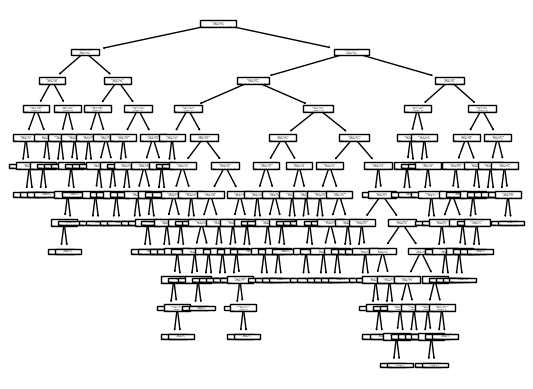

In [200]:
tree.plot_tree(model_cart)

In [201]:
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.703030303030303


In [202]:
print(metrics.classification_report(y_test,y_pred))

                    precision    recall  f1-score   support

jumping_jacks_down       0.67      0.75      0.71        40
  jumping_jacks_up       0.67      0.63      0.65        41
      pullups_down       0.65      0.62      0.63        39
        pullups_up       0.65      0.70      0.68        37
      pushups_down       0.84      0.78      0.81        27
        pushups_up       0.81      0.91      0.86        33
        situp_down       0.84      0.76      0.80        21
          situp_up       0.59      0.62      0.60        21
       squats_down       0.93      0.84      0.89        32
         squats_up       0.51      0.49      0.50        39

          accuracy                           0.70       330
         macro avg       0.72      0.71      0.71       330
      weighted avg       0.71      0.70      0.70       330



In [203]:
cart_grid={'max_depth': range(1,10), 'min_samples_split': list(range(2,50))}  #burda en uygun depth ve sample split değerlerini denettiriyoruz


In [204]:
cart = tree.DecisionTreeClassifier()
cart_cv = GridSearchCV(cart, cart_grid, cv = 10, n_jobs = -1, verbose = 2)
cart_cv_model = cart_cv.fit(X_train, y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits
[CV] END ...................max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=3; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=3; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=3; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=4; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=4; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=5; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=5; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=5; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=6; total time=   0.0s
[CV] END ...................max_depth=1, min

[CV] END ..................max_depth=1, min_samples_split=10; total time=   0.0s
[CV] END ..................max_depth=1, min_samples_split=10; total time=   0.0s
[CV] END ..................max_depth=1, min_samples_split=10; total time=   0.0s
[CV] END ..................max_depth=1, min_samples_split=10; total time=   0.0s
[CV] END ..................max_depth=1, min_samples_split=14; total time=   0.0s
[CV] END ..................max_depth=1, min_samples_split=14; total time=   0.0s
[CV] END ..................max_depth=1, min_samples_split=14; total time=   0.0s
[CV] END ..................max_depth=1, min_samples_split=14; total time=   0.0s
[CV] END ..................max_depth=1, min_samples_split=14; total time=   0.0s
[CV] END ..................max_depth=1, min_samples_split=14; total time=   0.0s
[CV] END ..................max_depth=1, min_samples_split=14; total time=   0.0s
[CV] END ..................max_depth=1, min_samples_split=14; total time=   0.0s
[CV] END ..................m

[CV] END ...................max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=3; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=3; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=4; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=4; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=4; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=5; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=5; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=6; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=6; total time=   0.0s
[CV] END ...................

In [207]:
print("En iyi parametreler: " + str(cart_cv_model.best_params_))

En iyi parametreler: {'max_depth': 8, 'min_samples_split': 5}


In [235]:
cart = tree.DecisionTreeClassifier(criterion= 'gini' ,max_depth = 8, min_samples_split = 2)
cart_tuned = cart.fit(X_train, y_train)

In [236]:
y_pred = cart_tuned.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.7242424242424242

[Text(0.3860161870503597, 0.9444444444444444, 'X[50] <= -58.264\ngini = 0.895\nsamples = 767\nvalue = [101, 100, 90, 73, 52, 83, 62, 51, 67, 88]'),
 Text(0.1137589928057554, 0.8333333333333334, 'X[79] <= -6.495\ngini = 0.63\nsamples = 185\nvalue = [0, 81, 77, 3, 0, 0, 6, 10, 4, 4]'),
 Text(0.0539568345323741, 0.7222222222222222, 'X[82] <= 4.172\ngini = 0.402\nsamples = 68\nvalue = [0, 52, 3, 0, 0, 0, 3, 5, 4, 1]'),
 Text(0.02877697841726619, 0.6111111111111112, 'X[79] <= -18.574\ngini = 0.755\nsamples = 14\nvalue = [0, 1, 3, 0, 0, 0, 3, 5, 2, 0]'),
 Text(0.014388489208633094, 0.5, 'X[34] <= 26.176\ngini = 0.469\nsamples = 8\nvalue = [0, 0, 0, 0, 0, 0, 3, 5, 0, 0]'),
 Text(0.007194244604316547, 0.3888888888888889, 'gini = 0.0\nsamples = 5\nvalue = [0, 0, 0, 0, 0, 0, 0, 5, 0, 0]'),
 Text(0.02158273381294964, 0.3888888888888889, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 0, 0, 0, 0, 3, 0, 0, 0]'),
 Text(0.04316546762589928, 0.5, 'X[7] <= -1.383\ngini = 0.611\nsamples = 6\nvalue = [0, 1, 3, 

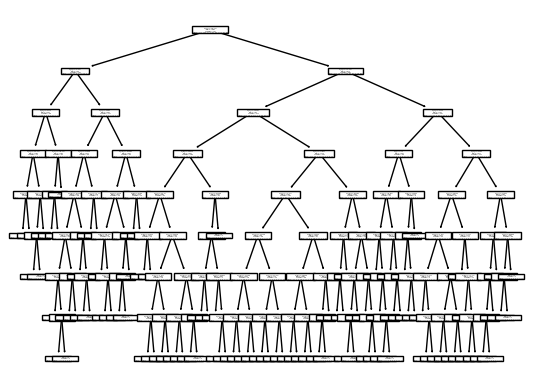

In [237]:
tree.plot_tree(cart_tuned)

RANDOM FOREST LEARNİNG 

In [238]:
from sklearn.ensemble import RandomForestClassifier

In [242]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 246)

In [243]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

In [244]:
rf_model

RandomForestClassifier()

In [245]:
y_pred = rf_model.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.8151515151515152

In [246]:
print(metrics.classification_report(y_test,y_pred))

                    precision    recall  f1-score   support

jumping_jacks_down       0.76      0.93      0.83        40
  jumping_jacks_up       0.87      0.80      0.84        41
      pullups_down       0.76      0.79      0.77        39
        pullups_up       0.84      0.73      0.78        37
      pushups_down       0.86      0.89      0.87        27
        pushups_up       0.91      0.97      0.94        33
        situp_down       0.83      0.90      0.86        21
          situp_up       0.71      0.57      0.63        21
       squats_down       0.82      0.84      0.83        32
         squats_up       0.79      0.69      0.74        39

          accuracy                           0.82       330
         macro avg       0.81      0.81      0.81       330
      weighted avg       0.82      0.82      0.81       330



KNN ALGORİTMASI İLE MODELLEME

In [218]:
model2 = exercise_data.dropna()
y= model2['pose']
X = model2.drop(['pose'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [219]:
from sklearn.neighbors import KNeighborsClassifier

In [220]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)
knn_model

KNeighborsClassifier()

In [221]:
y_pred = knn_model.predict(X_test)

/Users/gulsumirembas/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [222]:
metrics.accuracy_score(y_test, y_pred)

0.6454545454545455

In [223]:
print(metrics.classification_report(y_test,y_pred)) # knn modeli için 

                    precision    recall  f1-score   support

jumping_jacks_down       0.74      0.80      0.77        50
  jumping_jacks_up       0.60      0.80      0.69        45
      pullups_down       0.40      0.42      0.41        33
        pullups_up       0.59      0.49      0.53        35
      pushups_down       0.85      0.77      0.81        30
        pushups_up       0.84      0.84      0.84        32
        situp_down       0.73      0.80      0.76        20
          situp_up       0.67      0.36      0.47        28
       squats_down       0.62      0.62      0.62        34
         squats_up       0.41      0.39      0.40        23

          accuracy                           0.65       330
         macro avg       0.64      0.63      0.63       330
      weighted avg       0.65      0.65      0.64       330



In [224]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [225]:
knn_params = {"n_neighbors": np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv=10)
knn_cv.fit(X_train, y_train)

/Users/gulsumirembas/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/gulsumirembas/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

/Users/gulsumirembas/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/gulsumirembas/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

/Users/gulsumirembas/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/gulsumirembas/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

/Users/gulsumirembas/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/gulsumirembas/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

/Users/gulsumirembas/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/gulsumirembas/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

/Users/gulsumirembas/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/gulsumirembas/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

/Users/gulsumirembas/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/gulsumirembas/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

/Users/gulsumirembas/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/gulsumirembas/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

/Users/gulsumirembas/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/gulsumirembas/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

/Users/gulsumirembas/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/gulsumirembas/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

/Users/gulsumirembas/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/gulsumirembas/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

/Users/gulsumirembas/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/gulsumirembas/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

/Users/gulsumirembas/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/gulsumirembas/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

/Users/gulsumirembas/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/gulsumirembas/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

/Users/gulsumirembas/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/gulsumirembas/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

/Users/gulsumirembas/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/gulsumirembas/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

/Users/gulsumirembas/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/gulsumirembas/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

/Users/gulsumirembas/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/gulsumirembas/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

/Users/gulsumirembas/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/gulsumirembas/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

/Users/gulsumirembas/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/gulsumirembas/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

/Users/gulsumirembas/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/gulsumirembas/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

/Users/gulsumirembas/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/gulsumirembas/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

/Users/gulsumirembas/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/gulsumirembas/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

/Users/gulsumirembas/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/gulsumirembas/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

/Users/gulsumirembas/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/gulsumirembas/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

/Users/gulsumirembas/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/gulsumirembas/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [226]:
print("En iyi skor:" + str(knn_cv.best_score_))
print("En iyi parametreler: " + str(knn_cv.best_params_))

En iyi skor:0.6348769651401229
En iyi parametreler: {'n_neighbors': 1}


In [227]:
knn = KNeighborsClassifier(1)
knn_tuned = knn.fit(X_train, y_train)

In [228]:
knn_tuned.score(X_test, y_test)

/Users/gulsumirembas/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.6909090909090909

In [229]:
y_pred = knn_tuned.predict(X_test)

/Users/gulsumirembas/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [230]:
print(metrics.classification_report(y_test,y_pred))

                    precision    recall  f1-score   support

jumping_jacks_down       0.78      0.72      0.75        50
  jumping_jacks_up       0.65      0.71      0.68        45
      pullups_down       0.45      0.45      0.45        33
        pullups_up       0.81      0.60      0.69        35
      pushups_down       0.82      0.93      0.87        30
        pushups_up       0.93      0.81      0.87        32
        situp_down       0.75      0.90      0.82        20
          situp_up       0.81      0.46      0.59        28
       squats_down       0.70      0.76      0.73        34
         squats_up       0.35      0.57      0.43        23

          accuracy                           0.69       330
         macro avg       0.71      0.69      0.69       330
      weighted avg       0.71      0.69      0.69       330

[CV] END ..................max_depth=7, min_samples_split=37; total time=   0.1s
[CV] END ..................max_depth=7, min_samples_split=37; total time=   

[CV] END ..................max_depth=7, min_samples_split=35; total time=   0.1s
[CV] END ..................max_depth=7, min_samples_split=35; total time=   0.1s
[CV] END ..................max_depth=7, min_samples_split=35; total time=   0.1s
[CV] END ..................max_depth=7, min_samples_split=35; total time=   0.1s
[CV] END ..................max_depth=7, min_samples_split=38; total time=   0.1s
[CV] END ..................max_depth=7, min_samples_split=38; total time=   0.1s
[CV] END ..................max_depth=7, min_samples_split=38; total time=   0.1s
[CV] END ..................max_depth=7, min_samples_split=38; total time=   0.1s
[CV] END ..................max_depth=7, min_samples_split=38; total time=   0.1s
[CV] END ..................max_depth=7, min_samples_split=38; total time=   0.1s
[CV] END ..................max_depth=7, min_samples_split=38; total time=   0.1s
[CV] END ..................max_depth=7, min_samples_split=38; total time=   0.1s
[CV] END ..................m